# Day1 work（平井佐和）

## インポート

In [149]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## データ読み込み

In [150]:
df_data = pd.read_csv("../data/mushrooms.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


## 基礎集計

In [151]:
# 略称のままでは見にくいので変換して表示するための情報
out_info = {"e":"edible", "p":"poisonous"}
exp_info = {"surface":{"f":"fibrous", "y":"scaly", "k":"silky", "s":"smooth", "g":"grooves"},
        "color":{"n":"brown", "b":"buff", "c":"cinnamon", "g":"gray", "o":"orange", "p":"pink", "e":"red", "w":"white", "y":"yellow", "r":"green", "u":"purple", "k":"black", "h":"chocolate"},
        "shape":{"b":"bell", "c":"conical", "x":"convex", "f":"flat", "k":"knobbed", "s":"sunken", "e":"enlarging", "t":"tapering"},
        "bruises":{"t":"bruises", "f":"no"},
        "odor":{"a":"almond", "l":"anise", "c":"creosote", "y":"fishy", "f":"foul", "m":"musty", "n":"none", "p":"pungent", "s":"spicy"},
        "gill-attachment":{"a":"attached", "d":"descending", "f":"free", "n":"notched"},
        "gill-spacing":{"c":"close", "w":"crowded", "d":"distant"},
        "gill-size":{"b":"broad", "n":"narrow"},
        "stalk-root":{"b":"bulbous", "c":"club", "u":"cup", "e":"equal", "z":"rhizomorphs", "r":"rooted", "?":"missing"},
        "veil-type":{"p":"partial", "u":"universal"},
        "ring-number":{"n":"none", "o":"one", "t":"two"},
        "ring-type":{"c":"cobwebby", "e":"evanescent", "f":"flaring", "l":"large", "n":"none", "p":"pendant", "s":"sheathing", "z":"zone"},
        "population":{"a":"abundant", "c":"clustered", "n":"numerous", "s":"scattered", "v":"several", "y":"solitary"},
        "habitat":{"g":"grasses", "l":"leaves", "m":"meadows", "p":"paths", "u":"urban", "w":"waste", "d":"woods"}
       }

### ・クロス集計

cap-shape,bell,conical,flat,knobbed,sunken,convex,All
class,,,,,,,
edible,0.893805,0.0,0.506345,0.275362,1.0,0.532823,0.517971
poisonous,0.106195,1.0,0.493655,0.724638,0.0,0.467177,0.482029


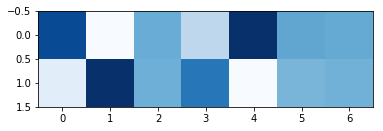

cap-surface,fibrous,grooves,smooth,scaly,All
class,,,,,
edible,0.672414,0.0,0.447574,0.463625,0.517971
poisonous,0.327586,1.0,0.552426,0.536375,0.482029


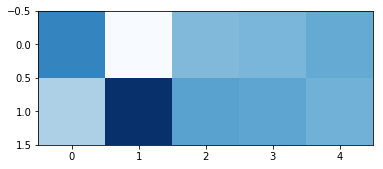

cap-color,buff,cinnamon,red,gray,brown,pink,green,purple,white,yellow,All
class,,,,,,,,,,,
edible,0.285714,0.727273,0.416,0.56087,0.553415,0.388889,1.0,1.0,0.692308,0.373134,0.517971
poisonous,0.714286,0.272727,0.584,0.43913,0.446585,0.611111,0.0,0.0,0.307692,0.626866,0.482029


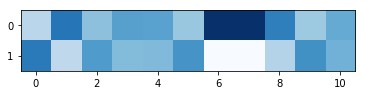

bruises,no,bruises,All
class,,,
edible,0.306655,0.815166,0.517971
poisonous,0.693345,0.184834,0.482029


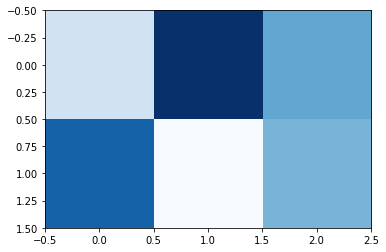

odor,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy,All
class,,,,,,,,,,
edible,1.0,0.0,0.0,1.0,0.0,0.965986,0.0,0.0,0.0,0.517971
poisonous,0.0,1.0,1.0,0.0,1.0,0.034014,1.0,1.0,1.0,0.482029


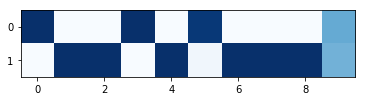

gill-attachment,attached,free,All
class,,,
edible,0.914286,0.507455,0.517971
poisonous,0.085714,0.492545,0.482029


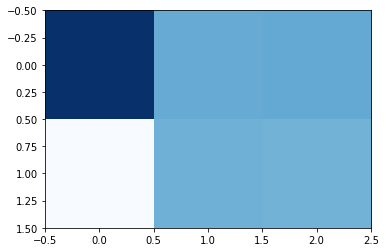

gill-spacing,close,crowded,All
class,,,
edible,0.441574,0.914634,0.517971
poisonous,0.558426,0.085366,0.482029


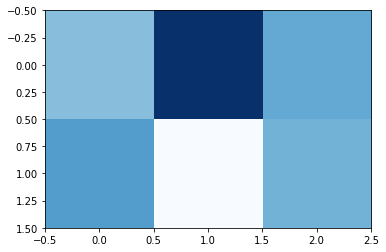

gill-size,broad,narrow,All
class,,,
edible,0.698503,0.11465,0.517971
poisonous,0.301497,0.88535,0.482029


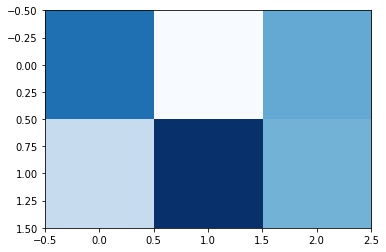

gill-color,buff,red,gray,chocolate,black,brown,orange,pink,green,purple,white,yellow,All
class,,,,,,,,,,,,,
edible,0.0,1.0,0.329787,0.278689,0.843137,0.89313,1.0,0.571046,0.0,0.902439,0.795341,0.744186,0.517971
poisonous,1.0,0.0,0.670213,0.721311,0.156863,0.10687,0.0,0.428954,1.0,0.097561,0.204659,0.255814,0.482029


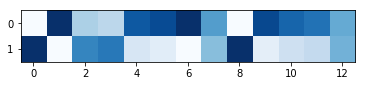

stalk-shape,enlarging,tapering,All
class,,,
edible,0.459613,0.5625,0.517971
poisonous,0.540387,0.4375,0.482029


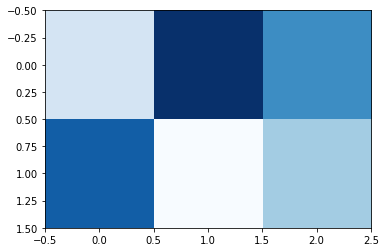

stalk-root,missing,bulbous,club,equal,rooted,All
class,,,,,,
edible,0.290323,0.508475,0.920863,0.771429,1.0,0.517971
poisonous,0.709677,0.491525,0.079137,0.228571,0.0,0.482029


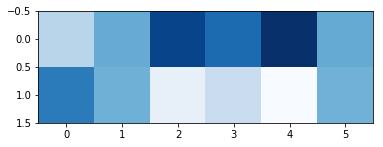

stalk-surface-above-ring,fibrous,silky,smooth,scaly,All
class,,,,,
edible,0.73913,0.060708,0.703246,0.666667,0.517971
poisonous,0.26087,0.939292,0.296754,0.333333,0.482029


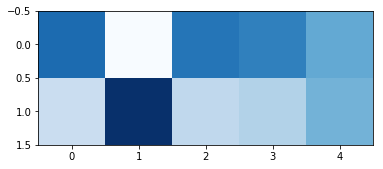

stalk-surface-below-ring,fibrous,silky,smooth,scaly,All
class,,,,,
edible,0.76,0.0625,0.688817,0.732394,0.517971
poisonous,0.24,0.9375,0.311183,0.267606,0.482029


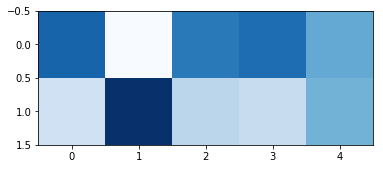

stalk-color-above-ring,buff,cinnamon,red,gray,brown,orange,pink,white,yellow,All
class,,,,,,,,,,
edible,0.0,0.0,1.0,1.0,0.035714,1.0,0.307692,0.616487,0.0,0.517971
poisonous,1.0,1.0,0.0,0.0,0.964286,0.0,0.692308,0.383513,1.0,0.482029


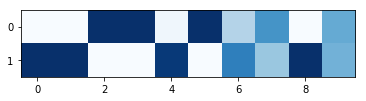

stalk-color-below-ring,buff,cinnamon,red,gray,brown,orange,pink,white,yellow,All
class,,,,,,,,,,
edible,0.0,0.0,1.0,1.0,0.125,1.0,0.307692,0.616788,0.0,0.517971
poisonous,1.0,1.0,0.0,0.0,0.875,0.0,0.692308,0.383212,1.0,0.482029


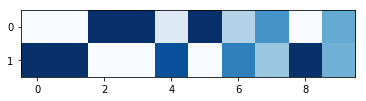

veil-type,partial,All
class,,
edible,0.517971,0.517971
poisonous,0.482029,0.482029


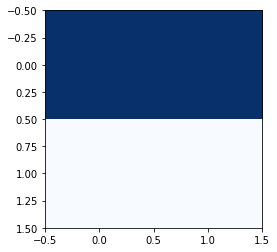

veil-color,brown,orange,white,yellow,All
class,,,,,
edible,1.0,1.0,0.506815,0.0,0.517971
poisonous,0.0,0.0,0.493185,1.0,0.482029


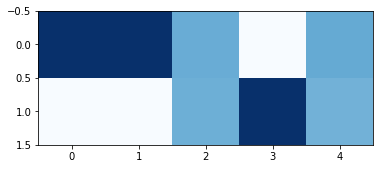

ring-number,none,one,two,All
class,,,,
edible,0.0,0.491453,0.88,0.517971
poisonous,1.0,0.508547,0.12,0.482029


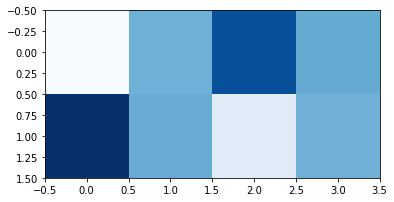

ring-type,evanescent,flaring,large,none,pendant,All
class,,,,,,
edible,0.363112,1.0,0.0,0.0,0.794355,0.517971
poisonous,0.636888,0.0,1.0,1.0,0.205645,0.482029


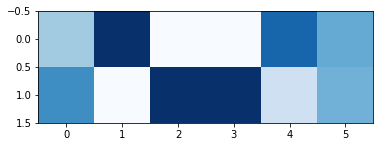

spore-print-color,buff,chocolate,black,brown,orange,green,purple,white,yellow,All
class,,,,,,,,,,
edible,1.0,0.029412,0.880342,0.886179,1.0,0.0,1.0,0.241206,1.0,0.517971
poisonous,0.0,0.970588,0.119658,0.113821,0.0,1.0,0.0,0.758794,0.0,0.482029


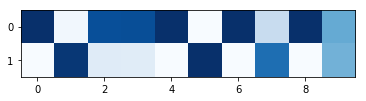

population,abundant,clustered,numerous,scattered,several,solitary,All
class,,,,,,,
edible,1.0,0.847059,1.0,0.705128,0.29505,0.621495,0.517971
poisonous,0.0,0.152941,0.0,0.294872,0.70495,0.378505,0.482029


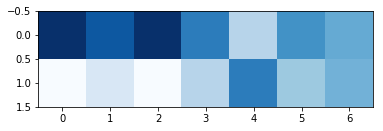

habitat,woods,grasses,leaves,meadows,paths,urban,waste,All
class,,,,,,,,
edible,0.597205,0.655493,0.288462,0.876712,0.118881,0.26087,1.0,0.517971
poisonous,0.402795,0.344507,0.711538,0.123288,0.881119,0.73913,0.0,0.482029


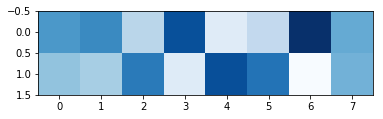

In [158]:
labels = df_data.columns
display_data = df_data

for label in labels:
    if label == "class":
        continue
    cross_data = pd.crosstab(index=display_data["class"], columns=display_data[label], margins=True, normalize='columns')

    # labelにinfoのkeyが含まれていたら置き換える
    for key in exp_info.keys():
        if key in label:
            for c in cross_data.columns:
                if c == "All":
                    continue
                cross_data = cross_data.rename(columns={c:exp_info[key][c]}, index=out_info)
    # データ表示
    display(cross_data)
    #　ヒートマップ表示
    fig, ax = plt.subplots()
    heatmap = ax.imshow(cross_data, cmap=plt.cm.Blues)
    plt.show()

## データの前処理＆特徴量エンジニアリング

### ・欠損の確認

In [153]:
df_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### ・カテゴリカル変数の前処理

In [154]:
for label in labels:
    if label == "class":
        # 「毒か否か」に直す
        dummy = pd.DataFrame(data=df_data[label].replace("e", 0).replace("p", 1))
        continue
    data = pd.get_dummies(df_data[label], prefix=label)
    dummy = pd.concat([dummy, data], axis=1)
display(dummy)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


## ロジスティック回帰

### ・全てを説明変数に使う

[[ 0.2875202   0.55803392 -0.06230235 -0.0487728  -0.54345732 -0.09895027
  -0.79693184  0.65061085  0.22841891  0.00997346  1.00655793 -0.8931357
   0.03304583  0.0449213  -0.38792033  0.83125171 -0.41796651 -0.33588748
   0.45983276 -0.24862814 -0.01617483  0.10824621 -2.75175296  2.68004071
   2.67499379 -2.77934496  0.31501224 -3.996072    2.22867823  0.86418342
   0.8563329  -0.10343556  0.19550694  1.52873916 -1.43666778 -2.10848866
   2.20056004  1.85806415 -0.55094635 -0.04271675  0.04392734 -0.38951697
  -0.62651759 -0.09381199 -0.407084    0.62099385 -0.15756471 -0.3401651
   0.1774095   0.67250588 -0.5804345  -0.42924637  2.3426111  -0.95637637
   0.11478884 -0.97970583 -0.6951851   1.76689656 -1.14040294  0.16076287
  -1.07563223  0.38749986 -0.50024803  1.28045178  0.19723132  0.31501224
  -0.47794676 -0.35978586 -0.14582569 -0.29202501  0.2830159  -0.01978055
   0.59217579  0.13598242  0.31501224 -0.3588451  -0.33521314 -0.93402293
  -0.29202501  0.36285656  0.31898551  0

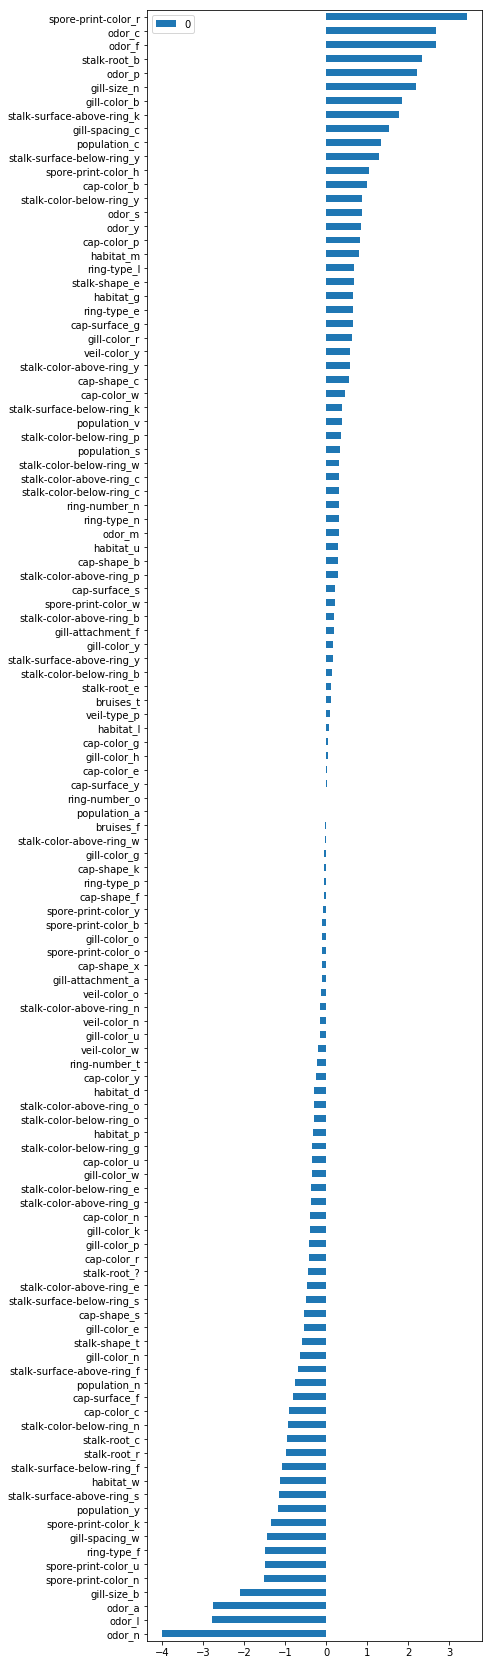

In [155]:
y = dummy["class"].values
x = dummy.drop(["class"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

# ロジスティック回帰
lr = LogisticRegression()
lr.fit(x_train, y_train)

# 結果表示
print(lr.coef_, lr.intercept_)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

coef_df = pd.DataFrame(lr.coef_[0], x.columns)
# coef_df.plot.barh(figsize=(10, 50))
coef_df2 = coef_df.sort_values(by=0)
coef_df2.plot.barh(figsize=(6, 30))

### ・ピックアップしてみた

[[-3.46465762  2.91015066  3.68270366 -3.4695984   0.92663272 -4.34340699
   3.19723547  0.77258473  0.77519214 -1.25560167  2.24243803  1.58639507
  -0.60679716  0.15661558 -0.01987438 -0.31533173 -0.66137655 -0.1822141
  -0.46627199  1.06807192 -0.19521562  0.13091228  0.49192304  0.4618378
   0.92663272 -0.7444731  -0.46380061  0.21891437 -0.69776857  0.22281412
  -0.30235454  1.36503417  0.36566983 -2.33769819  1.6110663   0.92663272
   0.42116571 -0.2330926   1.30638727 -1.80890344 -2.12000505 -0.22440149
   6.12689113 -2.37607099  0.52278285 -0.20675131]] [0.98683636]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       875
          1       1.00      0.99      0.99       750

avg / total       1.00      1.00      1.00      1625



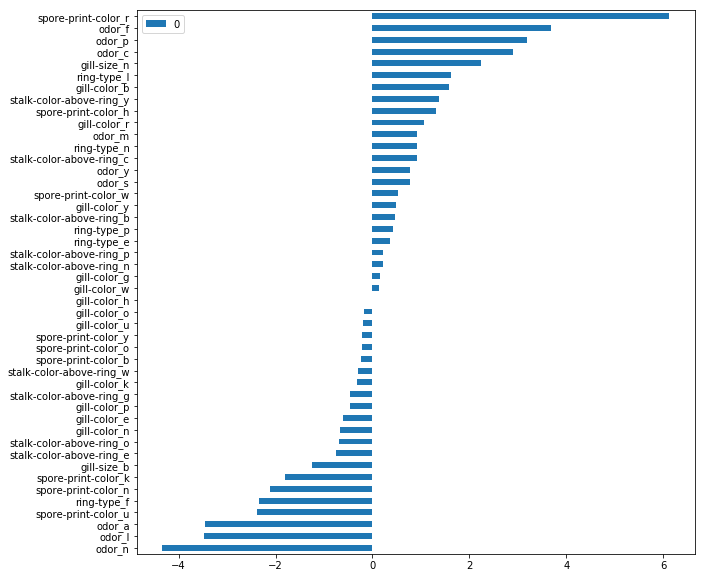

In [156]:
# クロス集計でみたときに使えそうなやつをピックアップ
# stalk-color-above-ringとstark-color-below-ringは非常に似ているので片方だけ使う
pick_label = ["odor", "stalk-color-above-ring", "ring-type", "gill-color", "gill-size", "spore-print-color"]
pick_data = pd.DataFrame(data=dummy["class"])
for label in dummy.columns:
    for p in pick_label:
        if p in label:
            pick_data = pd.concat([pick_data, dummy[label]], axis=1)

y = pick_data["class"].values
x = pick_data.drop(["class"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

# ロジスティック回帰
lr = LogisticRegression()
lr.fit(x_train, y_train)

# 結果表示
print(lr.coef_, lr.intercept_)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

coef_df = pd.DataFrame(lr.coef_[0], x.columns)
coef_df = coef_df.sort_values(by=0)
coef_df.plot.barh(figsize=(10, 10))

### 課題メモ
* 変数の妥当性の評価、VIFの計算ができていない
* 変数全部使ったら100％になってしまったけどこれでいいのか？

### フィードバック
* 相関係数でフィルタリングしていいのか → 他の変数と合わせたときに相関が発生するようなパターンがある
* Onehotでいいか → AorBのときに1など複数使う
* 意味を理解して新しい変数を作る　→　たとえばマッシュルームなら複数組み合わせた変数で決定木を作ると最初で98％出たりする
* 結果を解釈してデータをクレンジングする